# Xabarins Overview

# Imports 

In [1]:
import pandas as pd 
import numpy as np
from unicodedata import normalize
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Code 

## Import df 

In [2]:
# df_small = pd.read_csv("../src/dades/font/certificats.csv")

In [3]:
df_big_raw = pd.read_csv("../src/dades/font/certificats_clean_small.csv")

C:\Users\oriol\AppData\Local\Temp\ipykernel_17244\898226834.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_big_raw = pd.read_csv("../src/dades/font/certificats_clean_small.csv")


In [4]:
df_big = df_big_raw.copy()

In [5]:
df_big.shape

(374171, 61)

In [8]:
df_big.columns

Index(['Unnamed: 0', 'num_cas', 'adreca', 'numero', 'pis', 'codi_postal',
       'poblacio', 'comarca', 'nom_provincia', 'codi_poblacio', 'codi_comarca',
       'codi_provincia', 'referencia_cadastral', 'zona_climatica',
       'metres_cadastre', 'us_edifici',
       'qualificacio_de_consum_denergia_primaria_no_renovable',
       'energia_primaria_no_renovable', 'qualificacio_demissions_de_co2',
       'emissions_de_co2', 'consum_denergia_final',
       'cost_anual_aproximat_denergia_per_habitatge', 'vehicle_electric',
       'sistema_biomassa', 'xarxa_districte', 'energia_geotermica',
       'eina_de_certificacio', 'valor_aillaments', 'valor_finestres',
       'motiu_de_la_certificacio', 'valor_aillaments_cte',
       'valor_finestres_cte', 'utm_x', 'utm_y', 'normativa_construccio',
       'tipus_tramit', 'tipus_terciari', 'qualificacio_emissions_calefaccio',
       'emissions_calefaccio', 'qualificacio_emissions_refrigeracio',
       'emissions_refrigeracio', 'qualificacio_emissions_

In [9]:
column_renames = {}
for column in df_big.columns:
    c_cleaned = column.lower().replace(" ", "_").replace("'","")
    c_cleaned = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", c_cleaned), 0, re.I
    )
    c_cleaned = normalize( 'NFC', c_cleaned)
    column_renames[column] = c_cleaned

In [10]:
df_big = df_big.rename(columns=column_renames)

## Overview

In [11]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374171 entries, 0 to 374170
Data columns (total 61 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   unnamed:_0                                             374171 non-null  int64  
 1   num_cas                                                374171 non-null  object 
 2   adreca                                                 374171 non-null  object 
 3   numero                                                 374147 non-null  object 
 4   pis                                                    301472 non-null  object 
 5   codi_postal                                            374171 non-null  int64  
 6   poblacio                                               374171 non-null  object 
 7   comarca                                                374171 non-null  object 
 8   nom_provincia                     

## Analysis

In [12]:
columns_selected = [
    "num_cas",
    "zona_climatica",
    "metres_cadastre",
    "qualificacio_de_consum_denergia_primaria_no_renovable",
    "energia_primaria_no_renovable",
    "qualificacio_demissions_de_co2",
    "emissions_de_co2",
    "consum_denergia_final"
]

In [13]:
pd.set_option("display.float_format", "{:.10f}".format)

df_clean = df_big.dropna(subset=columns_selected) # treure nans en aquestes 
q99 = df_clean["emissions_de_co2"].quantile(0.99)
df_clean = df_clean[df_clean["emissions_de_co2"] < q99]

In [61]:
# Perform Shapiro-Wilk normality test on the entire emissions_de_co2 column
stat, p_value = stats.shapiro(df_clean["emissions_de_co2"])

# Print results
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"p-Value: {p_value:.2e}")

# Interpretation
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.9590
p-Value: 1.27e-112
The data does not appear to be normally distributed (reject H0).


c:\Users\oriol\Escritorio\estudios\master\b2\projectes\mds-udg-viz-i-dgpcd-hackathon-25\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 370428.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
import pandas as pd
import scipy.stats as stats

def check_normality(df, categorical_var, numerical_var):
    categories = df[categorical_var].unique()
    normality_results = []

    for category in categories:
        group_data = df[numerical_var][df[categorical_var] == category]
        
        stat, p_value = stats.shapiro(group_data)
        normality_results.append({
            "Category": category, 
            "p-Value": f"{p_value:.2e}",  # Format p-value in scientific notation
            "Query": categorical_var
        })

    return pd.DataFrame(normality_results)

# Example usage
normality_results_zona = check_normality(df_clean, "zona_climatica", "emissions_de_co2")
normality_results_qualificacio_demissions_de_co2 = check_normality(df_clean, "qualificacio_demissions_de_co2", "emissions_de_co2")
normality_results_qualificacio_de_consum_denergia_primaria_no_renovable = check_normality(df_clean, "qualificacio_de_consum_denergia_primaria_no_renovable", "emissions_de_co2")

final_results = pd.concat([
    normality_results_zona, 
    normality_results_qualificacio_demissions_de_co2, 
    normality_results_qualificacio_de_consum_denergia_primaria_no_renovable
])

final_results

c:\Users\oriol\Escritorio\estudios\master\b2\projectes\mds-udg-viz-i-dgpcd-hackathon-25\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29008.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\oriol\Escritorio\estudios\master\b2\projectes\mds-udg-viz-i-dgpcd-hackathon-25\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 268797.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\oriol\Escritorio\estudios\master\b2\projectes\mds-udg-viz-i-dgpcd-hackathon-25\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7814.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\oriol\Escritorio\estudios\master\b2\projectes\mds-udg-viz-i-dgpcd-hackathon-25\.venv\Lib\site-pac

,Category,p-Value,Query
0,D2,4.93e-50,zona_climatica
1,C2,2.35e-107,zona_climatica
2,D1,3.28e-31,zona_climatica
3,D3,2.18e-31,zona_climatica
4,B3,1.62e-65,zona_climatica
5,C3,3.97e-55,zona_climatica
6,E1,9.23e-26,zona_climatica
0,E,3.44e-100,qualificacio_demissions_de_co2
1,D,5.36e-97,qualificacio_demissions_de_co2
2,G,2.42e-72,qualificacio_demissions_de_co2


We can see how emissions CO2 is normally distributed within each qualification group.

In [15]:
def perform_anova(df, categorical_var, numerical_var):
    groups = [df[numerical_var][df[categorical_var] == category] for category in df[categorical_var].unique()]
    anova_result = stats.f_oneway(*groups)
    return anova_result

anova_consum = perform_anova(df_clean, "qualificacio_de_consum_denergia_primaria_no_renovable", "emissions_de_co2")
anova_emissions = perform_anova(df_clean, "qualificacio_demissions_de_co2", "emissions_de_co2")
anova_zona_climatica = perform_anova(df_clean, "zona_climatica", "emissions_de_co2")

anova_results = pd.DataFrame({
    "Qualification Type": ["Energy Consumption Rating", "CO₂ Emissions Rating", "Zona Climàtica"],
    "F-Statistic": [f"{anova_consum.statistic:.2f}", f"{anova_emissions.statistic:.2f}", f"{anova_zona_climatica.statistic:.2f}"],
    "p-Value": [f"{anova_consum.pvalue:.2f}", f"{anova_emissions.pvalue:.2f}", f"{anova_zona_climatica.pvalue:.2f}"]
})

anova_results

,Qualification Type,F-Statistic,p-Value
0,Energy Consumption Rating,80688.64,0.00
1,CO₂ Emissions Rating,112684.87,0.00
2,Zona Climàtica,2529.73,0.00


# Relació entre Eficiència Energètica i Emissions de Carboni

Per analitzar la relació entre eficiència energètica i emissions de CO₂, primer hem comprovat la normalitat de la distribució.

A continuació, hem realitzat una ANOVA per comparar la variable numèrica "emissions_de_co2" amb tres variables categòriques:

- **Qualificació de Consum d’Energia Primària No Renovable**
- **Qualificació d’Emissions de CO₂**
- **Zona Climàtica**

Els resultats han estat els següents:

| Tipus de Qualificació | Estadístic F | p-Valor |
|-----------------------|-------------|---------|
| Qualificació de Consum d’Energia Primària No Renovable | 80688.64 | 0.00 |
| Qualificació d’Emissions de CO₂ | 112684.87 | 0.00 |
| Zona Climàtica | 2529.73 | 0.00 |

## Interpretació

Els valors de **p-valor** són tots significatius (0.00), cosa que indica diferències estadísticament rellevants entre els grups de cada variable categòrica en relació amb les emissions de CO₂. 

- La **qualificació d’emissions de CO₂** presenta l’F més alt, la qual cosa suggereix que aquesta variable té la relació més forta amb les emissions de CO₂.
- La **qualificació de consum d’energia primària no renovable** també mostra una relació molt significativa, confirmant que l’eficiència energètica té un impacte directe en les emissions.
- La **zona climàtica** té un efecte menor en comparació amb les altres dues variables, però continua sent estadísticament significativa.

Aquests resultats reforcen la idea que una millor eficiència energètica es tradueix en una reducció d’emissions de CO₂, mentre que la zona climàtica influeix però amb menys pes que les qualificacions energètiques.


In [16]:
df_clean['energia_renovable'] = df_clean['consum_denergia_final'] - df_clean['energia_primaria_no_renovable']

In [17]:
df_clean['energia_renovable']

0         -31.0400000000
1         -17.0000000000
2         -27.5200000000
3         -54.2700000000
4        -249.7000000000
               ...      
374166    -32.2600000000
374167    -45.3300000000
374168    -39.0800000000
374169    -30.0200000000
374170    -89.8000000000
Name: energia_renovable, Length: 370428, dtype: float64

In [18]:
def perform_correlation(df, var1, var2):
    pearson_corr, pearson_p = stats.pearsonr(df[var1], df[var2])
    spearman_corr, spearman_p = stats.spearmanr(df[var1], df[var2])
    kendall_corr, kendall_p = stats.kendalltau(df[var1], df[var2])
    
    correlation_results = pd.DataFrame({
        "Correlation Type": ["Pearson", "Spearman", "Kendall"],
        "Correlation Coefficient": [f"{pearson_corr:.4f}", f"{spearman_corr:.4f}", f"{kendall_corr:.4f}"],
        "p-Value": [f"{pearson_p:.2f}", f"{spearman_p:.2f}", f"{kendall_p:.2f}"]
    })
    
    return correlation_results

correlation_results = perform_correlation(df_clean, "energia_primaria_no_renovable", "emissions_de_co2")
correlation_results

,Correlation Type,Correlation Coefficient,p-Value
0,Pearson,0.4412,0.00
1,Spearman,0.9555,0.00
2,Kendall,0.8401,0.00


In [19]:
correlation_results2 = perform_correlation(df_clean, "consum_denergia_final", "emissions_de_co2")
correlation_results2


,Correlation Type,Correlation Coefficient,p-Value
0,Pearson,0.6251,0.00
1,Spearman,0.6085,0.00
2,Kendall,0.5113,0.00


### Correlation Results

| Correlation Type | Primary Energy | Final Consumption |
|-----------------|-------------------|-------------------------|
| Pearson        | 0.4412 | 0.6251 |
| Spearman       | 0.9555 | 0.6085 |
| Kendall        | 0.8401 | 0.5113 |

#### 1. Pearson Correlation
Pearson correlation measures linear relationships between variables.
- The coefficient for primary energy is 0.4412, indicating a moderate positive correlation. This suggests that as "energia primària no renovable" increases, "emissions de CO2" also tend to increase, though not in a perfectly linear manner.
- The coefficient for final consumption is higher at 0.6251, indicating a stronger positive linear relationship. This suggests that the actual energy consumed at the final stage has a greater linear impact on emissions than the total primary energy used.

#### 2. Spearman Correlation
Spearman correlation measures monotonic relationships, meaning it captures how well the variables move together regardless of whether the relationship is linear.
- The coefficient for primary energy is 0.9555, which indicates a very strong positive monotonic relationship. This suggests that as primary energy increases, emissions consistently increase, even if not in a strictly linear fashion.
- The coefficient for final consumption is 0.6085, which still represents a strong positive relationship, though weaker than for primary energy. This implies that while final energy consumption impacts emissions, its effect may be influenced by other factors such as efficiency improvements or renewable contributions.

#### 3. Kendall Correlation
Kendall’s tau also measures monotonic relationships but is based on ranked data, making it more resistant to outliers.
- The coefficient for primary energy is 0.8401, indicating a strong positive correlation. This reinforces the Spearman result, confirming that as primary energy increases, emissions also tend to rise in a consistent pattern.
- The coefficient for final consumption is 0.5113, which, while still a positive correlation, is weaker than primary energy. This suggests that the relationship between final consumption and emissions is less direct, potentially due to variations in energy mix or efficiency improvements.

### Interpretation
- **Primary energy consumption has a stronger correlation with CO2 emissions than final consumption across all correlation methods.** This suggests that emissions are more directly linked to the total amount of non-renewable energy entering the system than to the final amount consumed.
- **Spearman and Kendall correlations show a stronger relationship for primary energy than for final consumption.** This implies that primary energy usage is a better predictor of emissions, possibly due to losses in generation and transport that do not appear in final consumption data.
- **Final consumption still has a strong correlation with emissions but is likely influenced by efficiency measures, renewable energy integration, or technological improvements.**

### Definition of Terms
**Energia primària no renovable:**
This is the energy in its original state before being converted or transformed (e.g., crude oil, natural gas, wind energy, etc.). It includes only non-renewable sources. Before reaching consumers, part of this energy is lost in electricity generation and transportation.

**Consum d’energia final:**
This is the energy that actually reaches buildings, industries, or households for use. For example, the electricity that arrives at your home after conversion losses at the power plant. It does not include generation and transport losses. Since it is not explicitly stated as non-renewable, we assume it includes both renewable and non-renewable sources.


In [30]:
df_clean['rehabilitacio_energetica'].value_counts()

rehabilitacio_energetica
False    177834
True        992
Name: count, dtype: int64

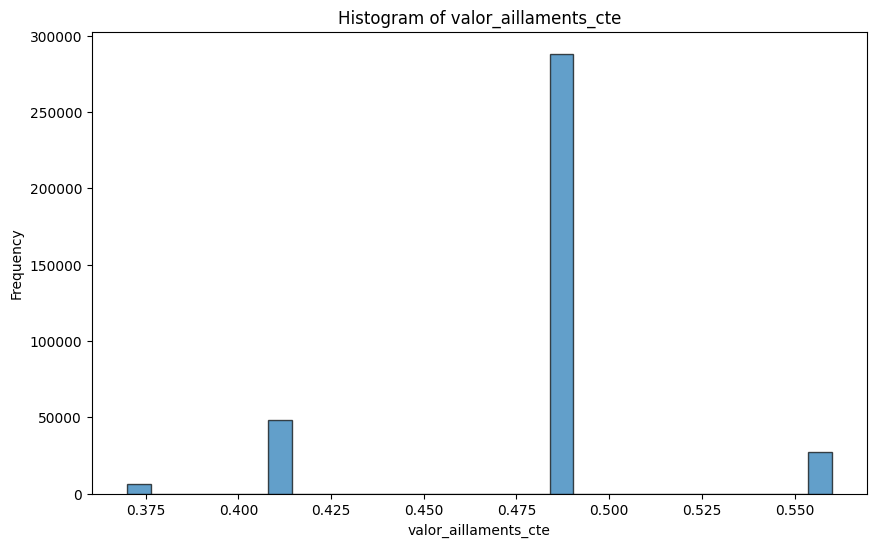

In [48]:
selected_column = 'valor_aillaments_cte'  # Replace with the column you want to plot

plt.figure(figsize=(10, 6))
df_clean[selected_column].hist(bins=30, edgecolor='black', alpha=0.7)
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_column}')
plt.grid(False)
plt.show()

In [65]:
df_clean['valor_aillaments_cte_cat'] = pd.Categorical(df_clean['valor_aillaments_cte'])

# Assign category labels with real numerical values
df_clean['valor_aillaments_cte_cat'] = df_clean['valor_aillaments_cte_cat'].cat.rename_categories({
    val: f"{val}" for val in df_clean['valor_aillaments_cte_cat'].unique()
})

df_clean['valor_aillaments_cte_cat'].value_counts()


valor_aillaments_cte_cat
0.49    288163
0.41     48477
0.56     27462
0.37      6326
Name: count, dtype: int64

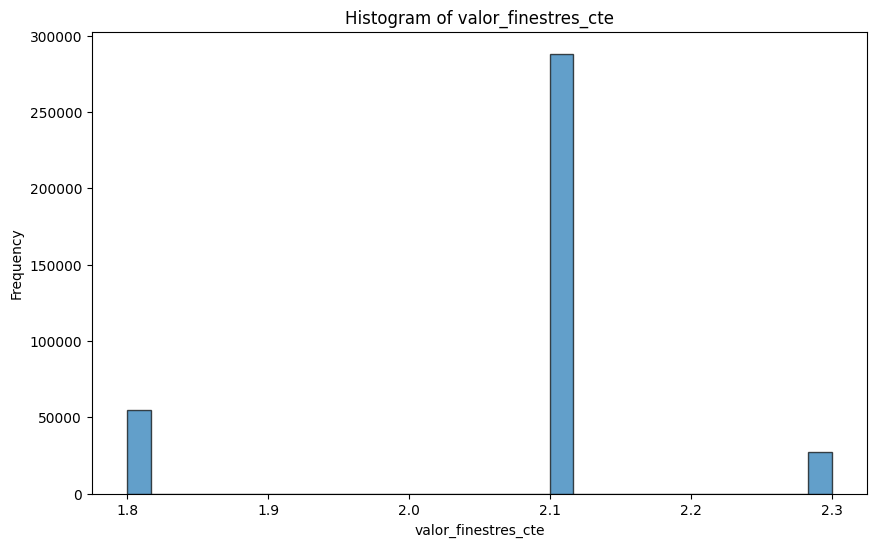

In [66]:
selected_column = 'valor_finestres_cte'  # Replace with the column you want to plot

plt.figure(figsize=(10, 6))
df_clean[selected_column].hist(bins=30, edgecolor='black', alpha=0.7)
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_column}')
plt.grid(False)
plt.show()

In [67]:
df_clean['valor_finestres_cte_cat'] = pd.Categorical(df_clean['valor_finestres_cte'])

# Assign real numerical values as category names
df_clean['valor_finestres_cte_cat'] = df_clean['valor_finestres_cte_cat'].cat.rename_categories({
    df_clean['valor_finestres_cte_cat'].unique()[0]: f"{df_clean['valor_finestres_cte_cat'].unique()[0]}",
    df_clean['valor_finestres_cte_cat'].unique()[1]: f"{df_clean['valor_finestres_cte_cat'].unique()[1]}",
    df_clean['valor_finestres_cte_cat'].unique()[2]: f"{df_clean['valor_finestres_cte_cat'].unique()[2]}"
})

df_clean['valor_finestres_cte_cat'].value_counts()


valor_finestres_cte_cat
2.1    288163
1.8     54803
2.3     27462
Name: count, dtype: int64

In [68]:
df_clean[['us_edifici','normativa_construccio','emissions_de_co2','consum_denergia_final','valor_aillaments_cte_cat','valor_finestres_cte_cat','qualificacio_demissions_de_co2']].to_csv('../df_clean.csv')

  normativa_construccio  mean_emissions_de_co2        ratio
0         Abans de 1979          44.6752162260 3.0542218469
1         Antes de 1979          44.0653833049 2.8527681492
2              CTE 2006          30.1365142156 3.3520735749
3              CTE 2013          26.9314239029 3.3644143380
4              CTE 2019          31.2700000000 3.1915574033
5             NBE-CT-79          43.5489911665 3.3487180152
6             NRE-AT-87          40.8709779570 3.4068503908


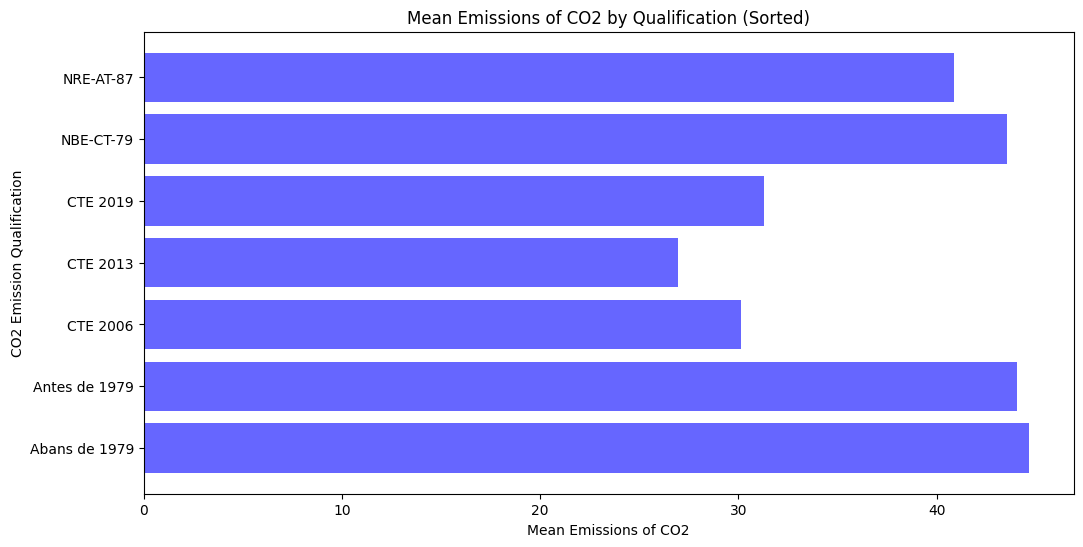

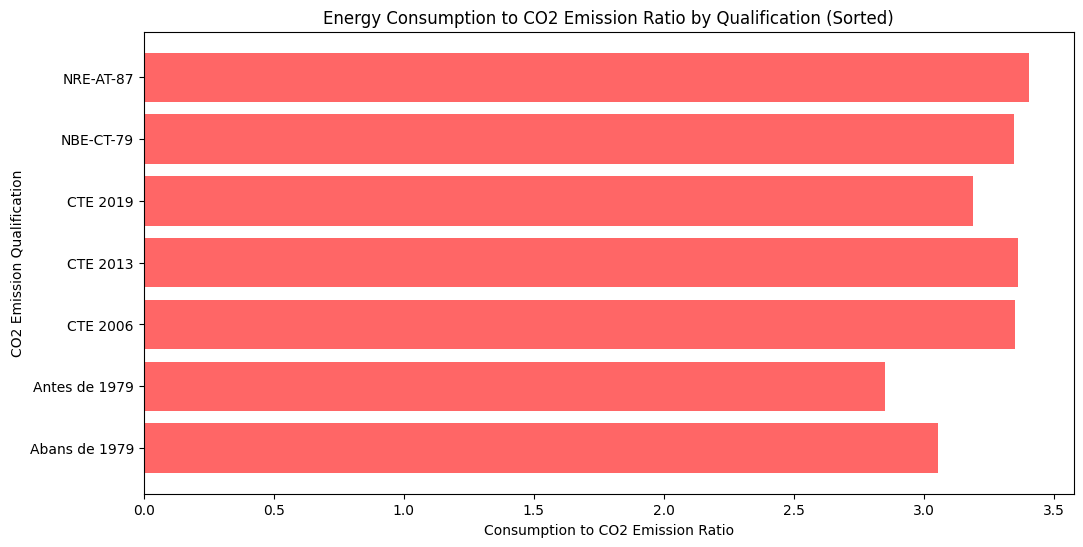

In [41]:
# us_edifici
# normativa_construccio
# valor_aillaments_cte
# valor_finestres_cte
columna = "normativa_construccio"
grouped_df = df_clean.groupby(columna).agg(
    mean_emissions_de_co2=('emissions_de_co2', 'mean'),
    ratio=('consum_denergia_final', lambda x: (x.sum() / df_clean.loc[x.index, 'emissions_de_co2'].sum()))  # Weighted mean
).reset_index() 

print(grouped_df)

plt.figure(figsize=(12, 6))
plt.barh(grouped_df[columna], grouped_df["mean_emissions_de_co2"], color='blue', alpha=0.6)
plt.xlabel("Mean Emissions of CO2")
plt.ylabel("CO2 Emission Qualification")
plt.title("Mean Emissions of CO2 by Qualification (Sorted)")
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(grouped_df[columna], grouped_df["ratio"], color='red', alpha=0.6)
plt.xlabel("Consumption to CO2 Emission Ratio")
plt.ylabel("CO2 Emission Qualification")
plt.title("Energy Consumption to CO2 Emission Ratio by Qualification (Sorted)")
plt.show()


In [25]:
import itertools

grouping_columns = [
    "us_edifici",
    "qualificacio_demissions_de_co2",
    "qualificacio_de_consum_denergia_primaria_no_renovable",
    "zona_climatica",
    "normativa_construccio",
    "rehabilitacio_energetica",
    "tipus_tramit",
]

grouping_combinations = []
for r in range(1, 4):  # Try groups of size 1, 2, and 3
    grouping_combinations.extend(itertools.combinations(grouping_columns, r))

grouping_results = {}

for group in grouping_combinations:
    group_name = " | ".join(group)  # String representation of the grouping
    grouped = df_clean.groupby(list(group))["emissions_de_co2"].mean().reset_index()
    max_emission = grouped["emissions_de_co2"].max()  # Highest emission found in this group
    grouping_results[group_name] = max_emission  # Store result

pd.set_option('display.max_colwidth', None)
results_df = pd.DataFrame(grouping_results.items(), columns=["Grouping", "Max Mean Emissions"])
results_df = results_df.sort_values(by="Max Mean Emissions", ascending=False)
results_df

,Grouping,Max Mean Emissions
53,qualificacio_de_consum_denergia_primaria_no_renovable | zona_climatica | normativa_construccio,96.9466666667
29,us_edifici | qualificacio_demissions_de_co2 | zona_climatica,95.9500000000
47,qualificacio_demissions_de_co2 | zona_climatica | normativa_construccio,94.5700000000
30,us_edifici | qualificacio_demissions_de_co2 | normativa_construccio,91.5800000000
43,qualificacio_demissions_de_co2 | qualificacio_de_consum_denergia_primaria_no_renovable | zona_climatica,91.0303773585
...,...,...
25,normativa_construccio | rehabilitacio_energetica,45.7102898551
26,normativa_construccio | tipus_tramit,45.6668055556
4,normativa_construccio,44.6752162260
5,rehabilitacio_energetica,43.0868712395


   qualificacio_demissions_de_co2 zona_climatica  mean_emissions_de_co2  \
0                               A             B3           6.9368750000   
1                               A             C2           7.3346179402   
2                               A             C3           6.4241666667   
3                               A             D1           5.8251851852   
4                               A             D2           6.3271028037   
5                               A             D3           7.2205357143   
6                               A             E1           7.8898113208   
7                               B             B3           9.7420000000   
8                               B             C2          11.5527304965   
9                               B             C3          11.5074193548   
10                              B             D1          12.6251898734   
11                              B             D2          11.7487562189   
12                       

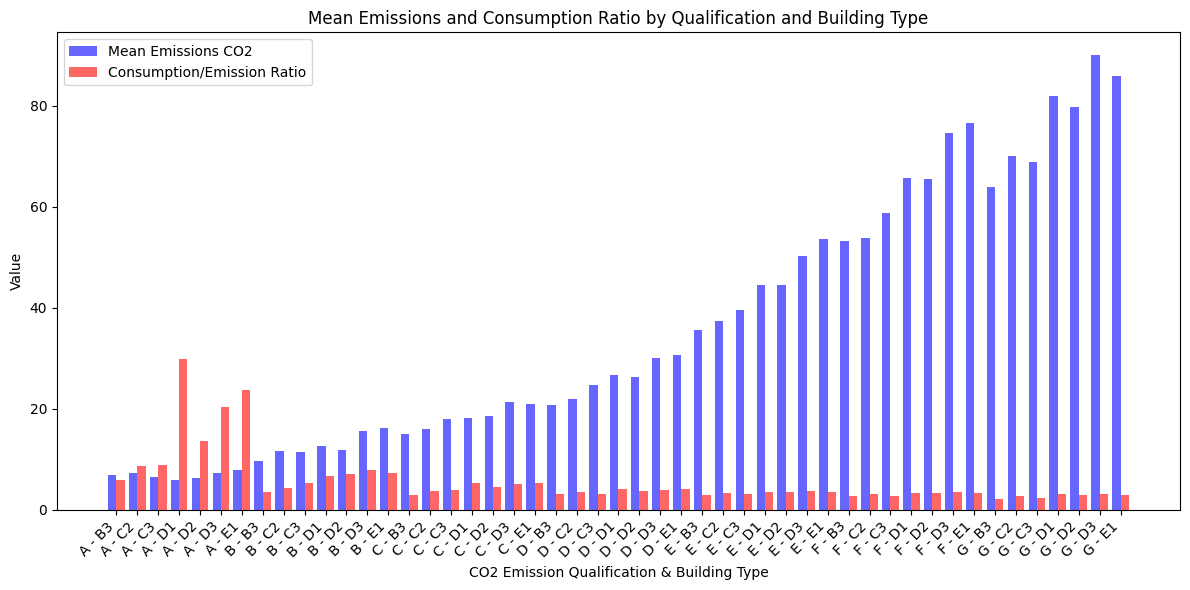

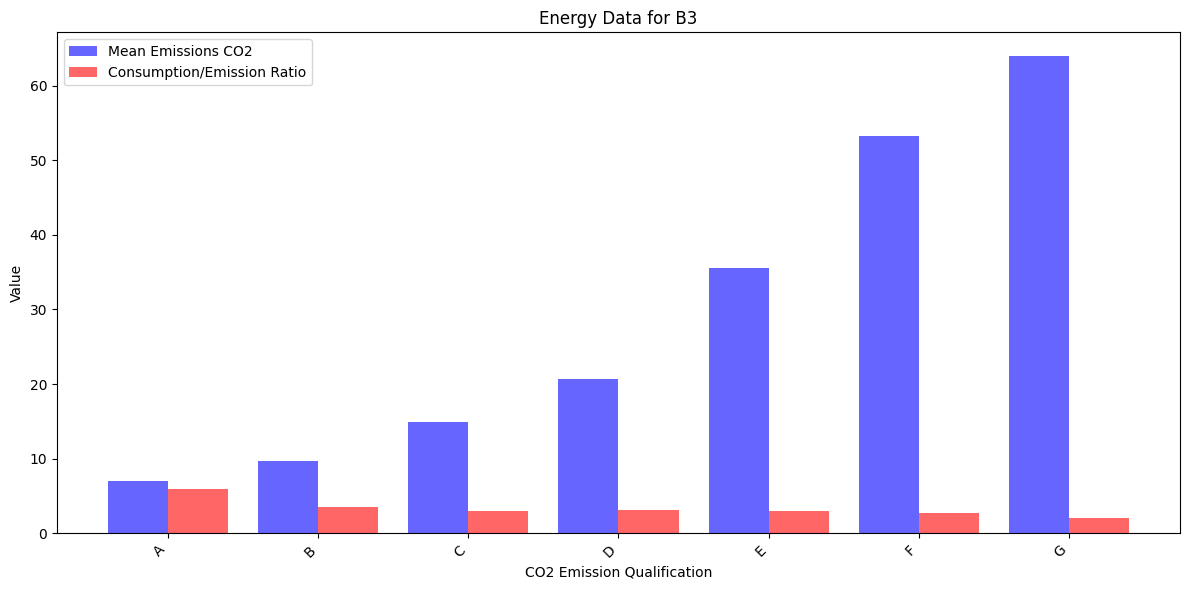

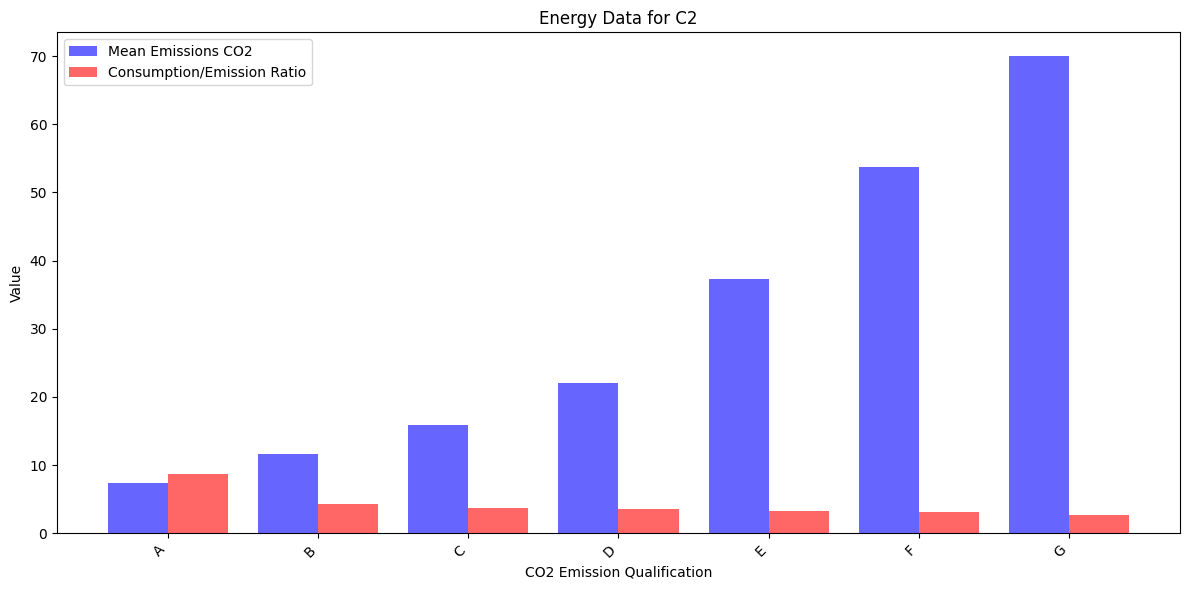

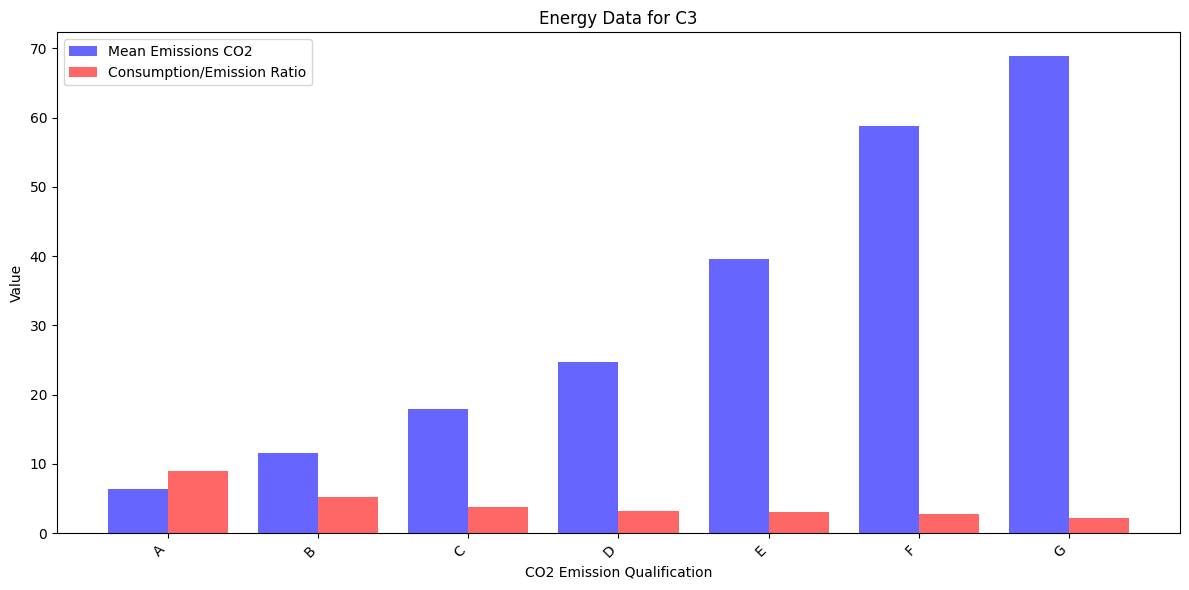

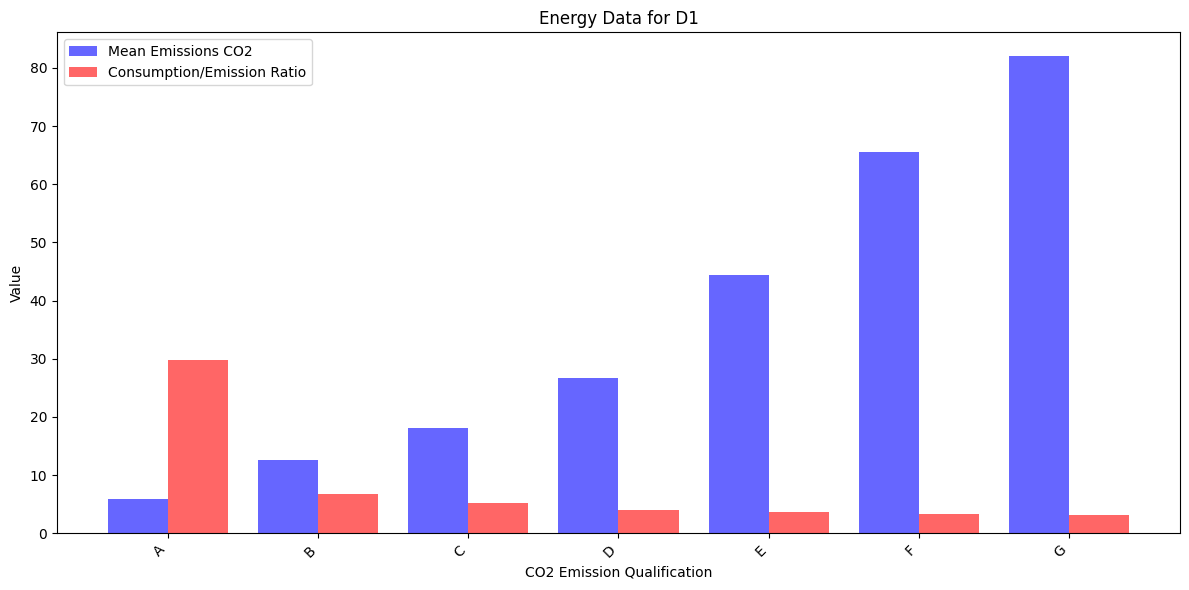

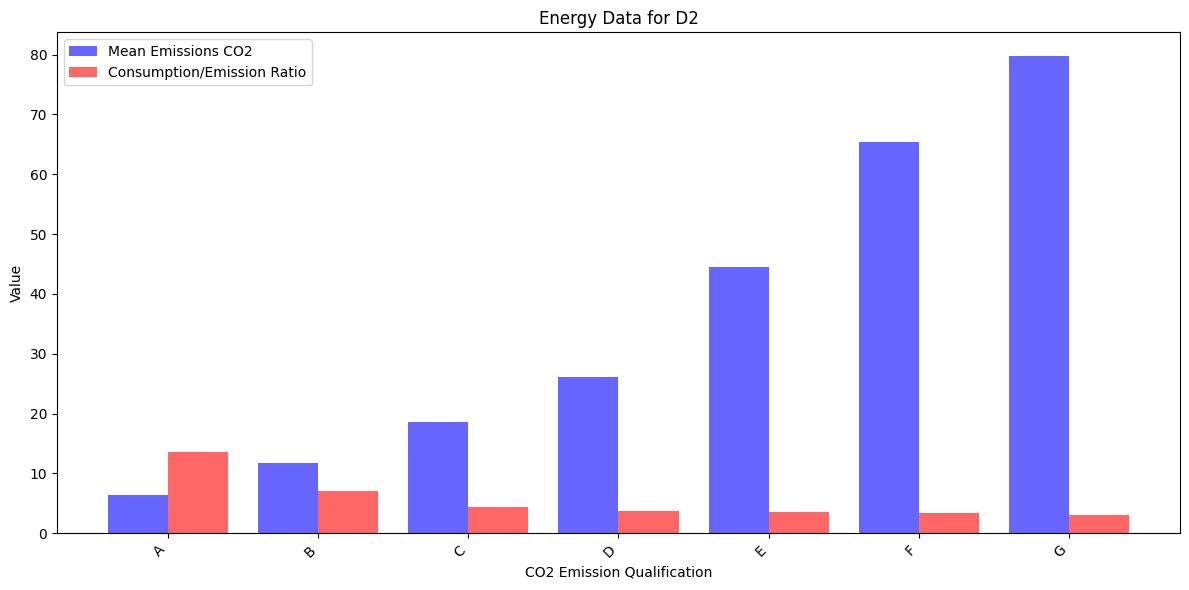

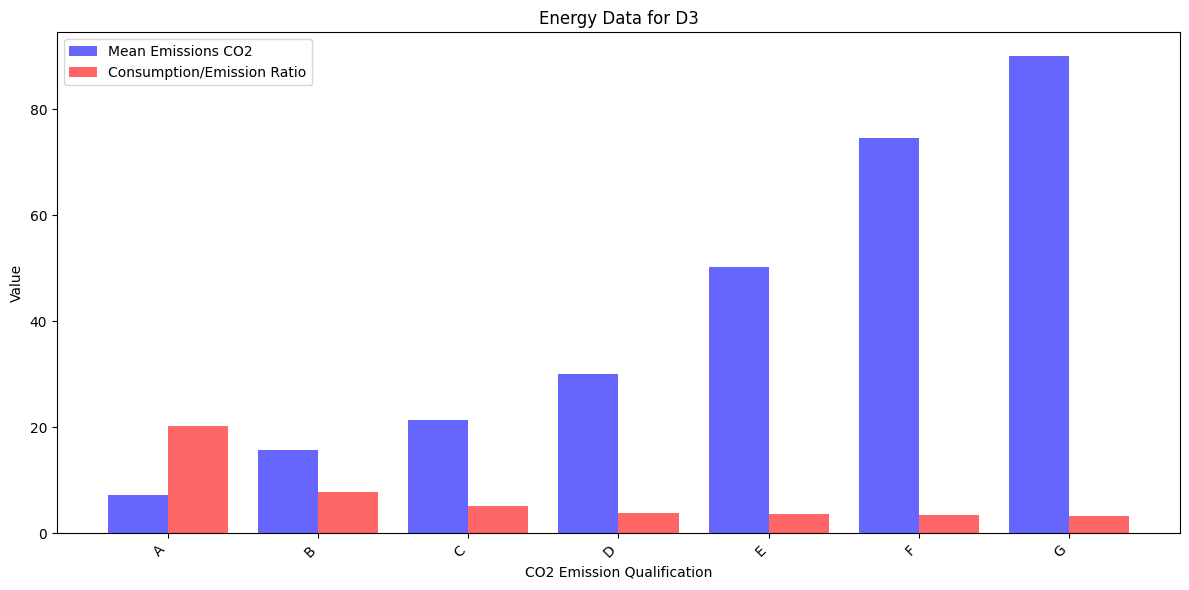

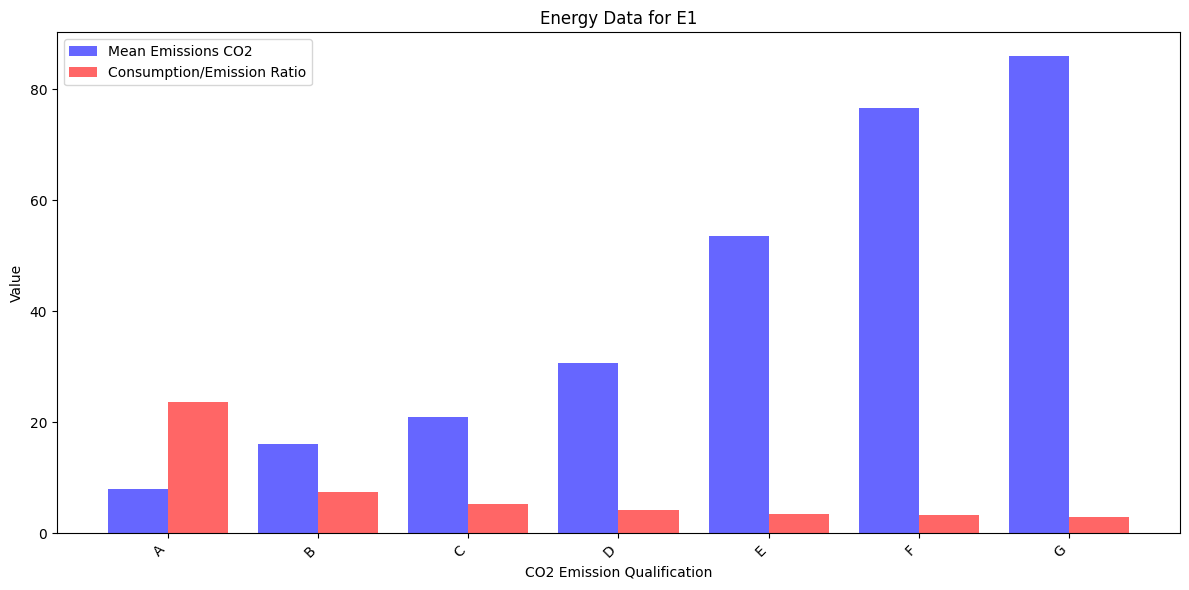

In [ ]:
column_to_us = "zona_climatica"
grouped_df = df_clean.groupby(["qualificacio_demissions_de_co2", column_to_us]).agg(
    mean_emissions_de_co2=('emissions_de_co2', 'mean'),
    ratio=('consum_denergia_final', lambda x: (x.sum() / df_clean.loc[x.index, 'emissions_de_co2'].sum()))  # Weighted mean
).reset_index()

print(grouped_df)

# 🎨 Plot combinat: Emissions mitjanes i Ratio al mateix gràfic, amb barres SEPARADES
fig, ax = plt.subplots(figsize=(12, 6))

x_labels = grouped_df["qualificacio_demissions_de_co2"] + " - " + grouped_df[column_to_us]
x = np.arange(len(x_labels))  # Índexs numèrics
width = 0.4  # Amplada de les barres per separar-les

# Dibuixar les barres SEPARADES
ax.bar(x - width/2, grouped_df["mean_emissions_de_co2"], width, color='blue', alpha=0.6, label="Mean Emissions CO2")
ax.bar(x + width/2, grouped_df["ratio"], width, color='red', alpha=0.6, label="Consumption/Emission Ratio")

ax.set_xlabel("CO2 Emission Qualification & Building Type")
ax.set_ylabel("Value")
ax.set_title("Mean Emissions and Consumption Ratio by Qualification and Building Type")
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

building_types = grouped_df[column_to_us].unique()

for building in building_types:
    subset = grouped_df[grouped_df[column_to_us] == building]
    
    x_labels = subset["qualificacio_demissions_de_co2"]
    x = np.arange(len(x_labels))  # Índexs numèrics

    plt.figure(figsize=(12, 6))
    
    plt.bar(x - width/2, subset["mean_emissions_de_co2"], width, color='blue', alpha=0.6, label="Mean Emissions CO2")
    plt.bar(x + width/2, subset["ratio"], width, color='red', alpha=0.6, label="Consumption/Emission Ratio")
    
    plt.xlabel("CO2 Emission Qualification")
    plt.ylabel("Value")
    plt.title(f"Energy Data for {building}")
    plt.xticks(x, x_labels, rotation=45, ha="right")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [24]:
sns.pairplot(df_clean, vars=['energia_calefaccio', 'energia_refrigeracio', 'energia_acs', 'energia_renovable', 'emissions_de_co2'])
plt.show()

KeyboardInterrupt: 

  qualificacio_demissions_de_co2  mean_emissions_de_co2         ratio
0                              A           7.0163011457 13.5242829418
1                              B          11.9479553265  5.1450410404
2                              C          16.7504720073  3.9378617104
3                              D          23.0782263523  3.5617438305
4                              E          38.5955083516  3.3053149736
5                              F          56.2666486379  3.1215448514
6                              G          71.2078967466  2.7092469782


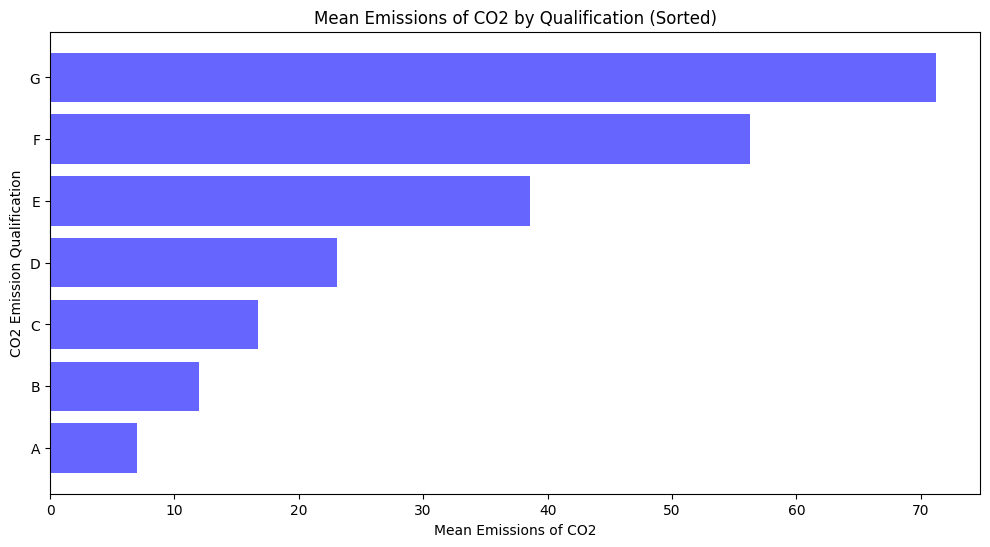

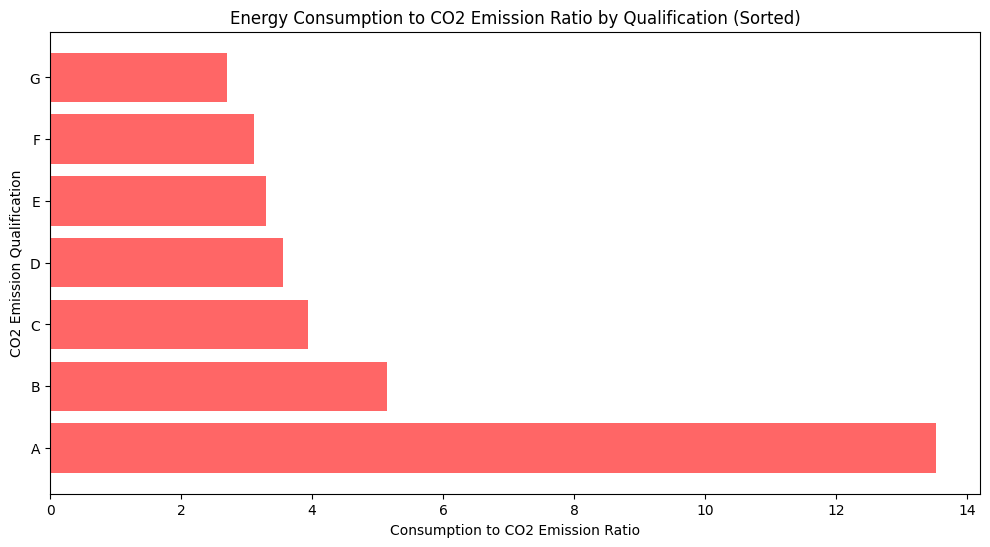

In [71]:
grouped_df = df_clean.groupby("qualificacio_demissions_de_co2").agg(
    mean_emissions_de_co2=('emissions_de_co2', 'mean'),
    ratio=('consum_denergia_final', lambda x: (x.sum() / df_clean.loc[x.index, 'emissions_de_co2'].sum()))  # Weighted mean
).reset_index() 

print(grouped_df)
grouped_df.to_csv('resultat_p1.csv')

plt.figure(figsize=(12, 6))
plt.barh(grouped_df["qualificacio_demissions_de_co2"], grouped_df["mean_emissions_de_co2"], color='blue', alpha=0.6)
plt.xlabel("Mean Emissions of CO2")
plt.ylabel("CO2 Emission Qualification")
plt.title("Mean Emissions of CO2 by Qualification (Sorted)")
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(grouped_df["qualificacio_demissions_de_co2"], grouped_df["ratio"], color='red', alpha=0.6)
plt.xlabel("Consumption to CO2 Emission Ratio")
plt.ylabel("CO2 Emission Qualification")
plt.title("Energy Consumption to CO2 Emission Ratio by Qualification (Sorted)")
plt.show()


   qualificacio_demissions_de_co2          us_edifici  mean_emissions_de_co2  \
0                               A  Bloc plurifamiliar           6.9294117647   
1                               A   Habitatge en bloc           5.0041420118   
2                               A            Terciari          17.2257575758   
3                               A         Unifamiliar           6.0906963788   
4                               B  Bloc plurifamiliar           8.9681395349   
5                               B   Habitatge en bloc           9.0713525499   
6                               B            Terciari          26.7061437908   
7                               B         Unifamiliar          12.6652777778   
8                               C  Bloc plurifamiliar          14.2137815126   
9                               C   Habitatge en bloc          13.8802191276   
10                              C            Terciari          32.7714107143   
11                              C       

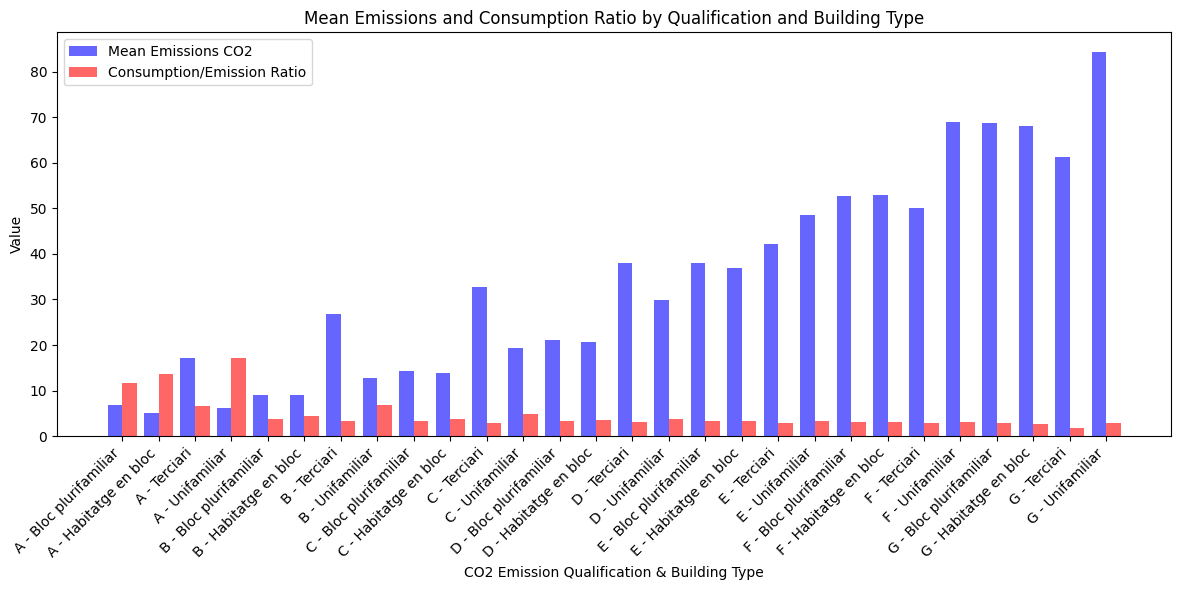

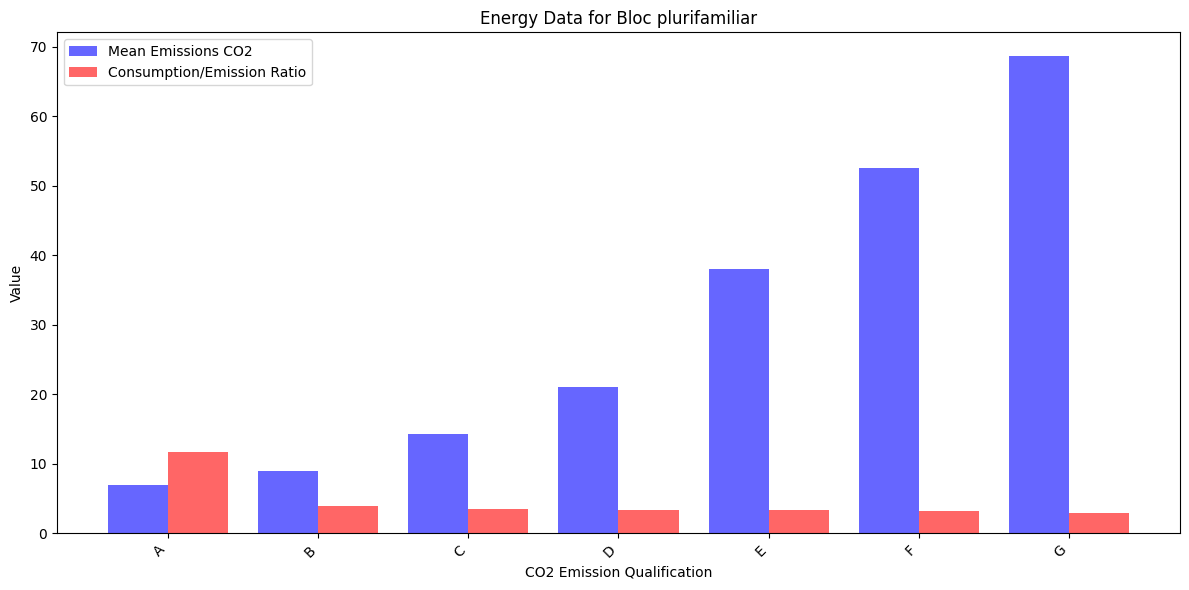

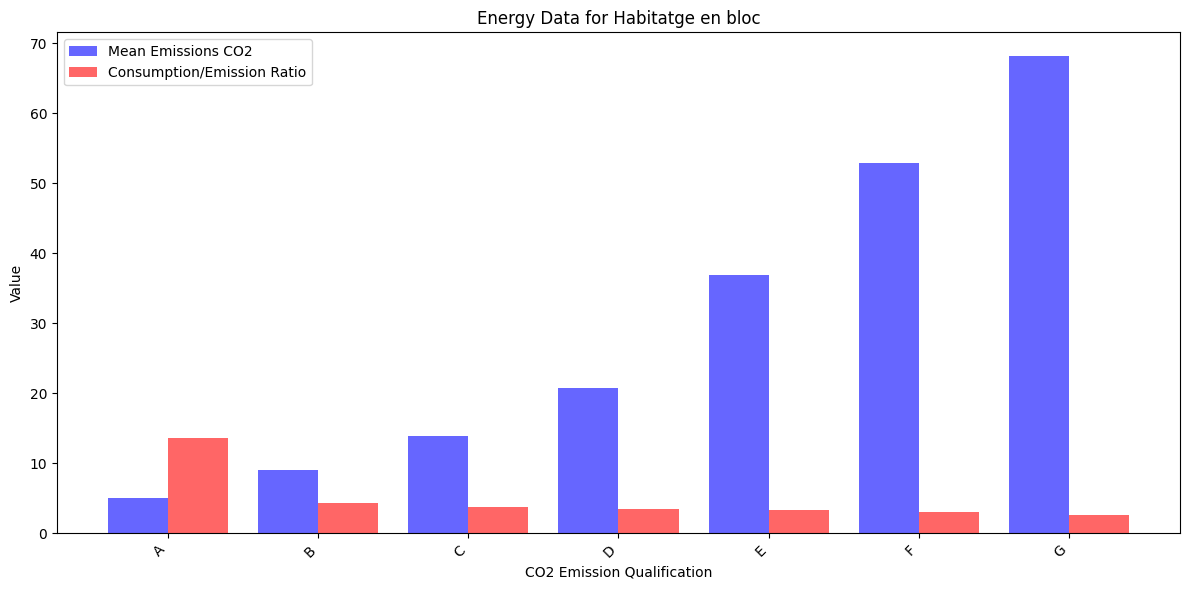

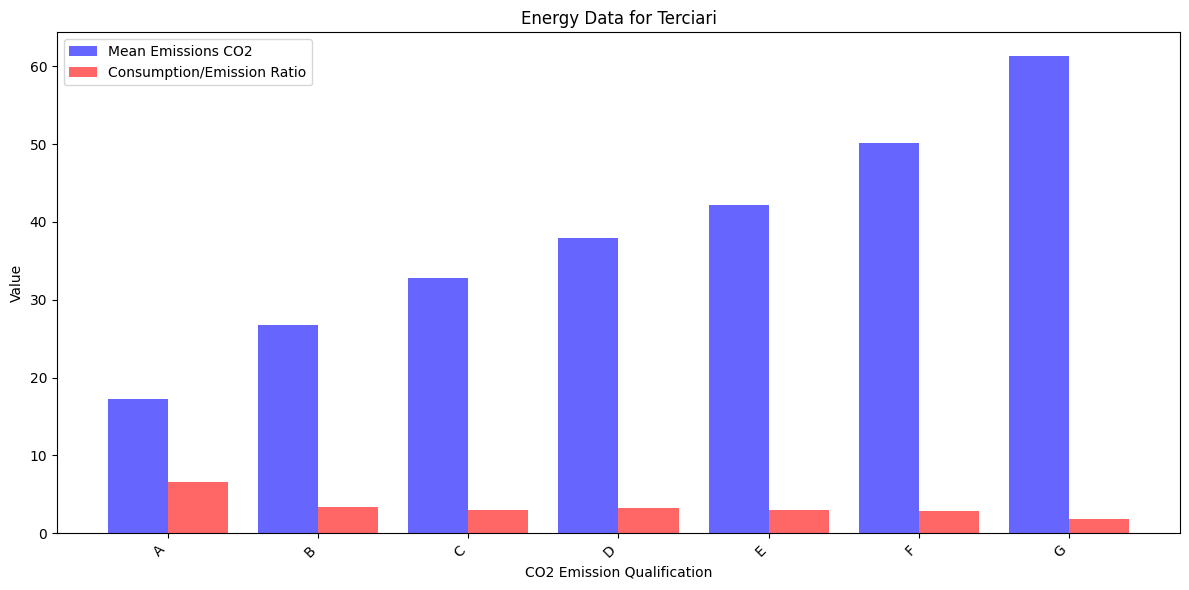

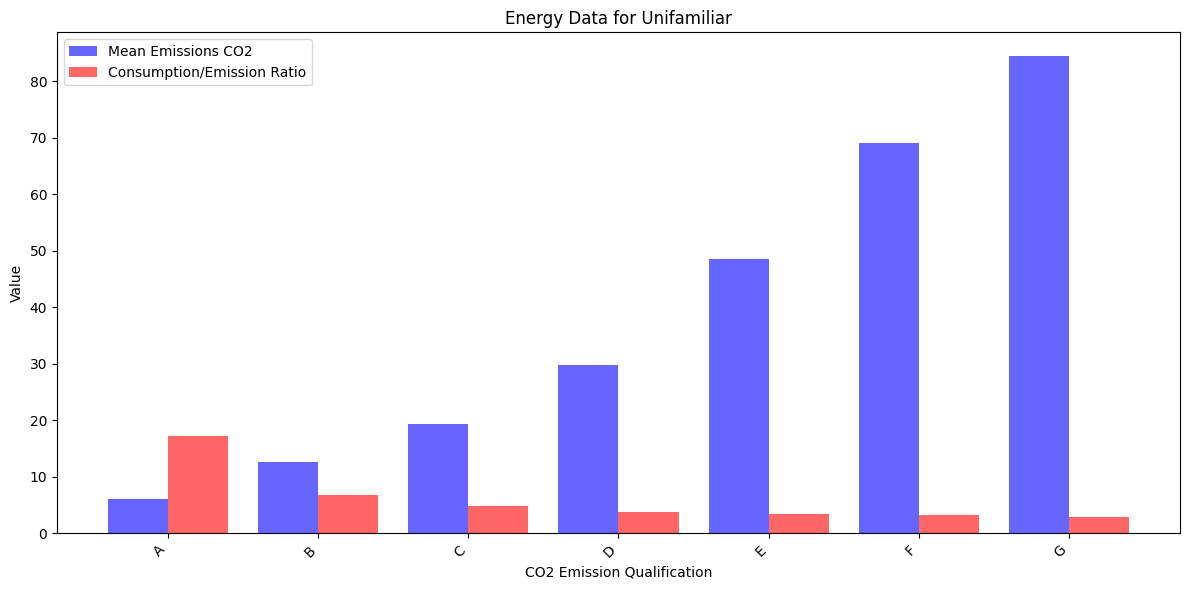

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar per qualificació d'emissions i tipus d'edifici
grouped_df = df_clean.groupby(["qualificacio_demissions_de_co2", "us_edifici"]).agg(
    mean_emissions_de_co2=('emissions_de_co2', 'mean'),
    ratio=('consum_denergia_final', lambda x: (x.sum() / df_clean.loc[x.index, 'emissions_de_co2'].sum()))  # Weighted mean
).reset_index()

print(grouped_df)

# 🎨 Plot combinat: Emissions mitjanes i Ratio al mateix gràfic, amb barres SEPARADES
fig, ax = plt.subplots(figsize=(12, 6))

# Definir posicions per a cada grup
x_labels = grouped_df["qualificacio_demissions_de_co2"] + " - " + grouped_df["us_edifici"]
x = np.arange(len(x_labels))  # Índexs numèrics
width = 0.4  # Amplada de les barres per separar-les

# Dibuixar les barres SEPARADES
ax.bar(x - width/2, grouped_df["mean_emissions_de_co2"], width, color='blue', alpha=0.6, label="Mean Emissions CO2")
ax.bar(x + width/2, grouped_df["ratio"], width, color='red', alpha=0.6, label="Consumption/Emission Ratio")

# Configuració del gràfic
ax.set_xlabel("CO2 Emission Qualification & Building Type")
ax.set_ylabel("Value")
ax.set_title("Mean Emissions and Consumption Ratio by Qualification and Building Type")
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

# 📊 Un plot per cada tipus d'edifici, amb barres separades
building_types = grouped_df["us_edifici"].unique()

for building in building_types:
    subset = grouped_df[grouped_df["us_edifici"] == building]
    
    x_labels = subset["qualificacio_demissions_de_co2"]
    x = np.arange(len(x_labels))  # Índexs numèrics

    plt.figure(figsize=(12, 6))
    
    plt.bar(x - width/2, subset["mean_emissions_de_co2"], width, color='blue', alpha=0.6, label="Mean Emissions CO2")
    plt.bar(x + width/2, subset["ratio"], width, color='red', alpha=0.6, label="Consumption/Emission Ratio")
    
    plt.xlabel("CO2 Emission Qualification")
    plt.ylabel("Value")
    plt.title(f"Energy Data for {building}")
    plt.xticks(x, x_labels, rotation=45, ha="right")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [46]:
def perform_grouped_correlation(df, var1, var2, group_vars):
    results = []
    
    for group_var in group_vars:
        grouped = df.groupby(group_var)
        
        for group_name, group_data in grouped:
            if len(group_data) > 1:  # Ensure there's enough data for correlation
                pearson_corr, pearson_p = stats.pearsonr(group_data[var1], group_data[var2])
                spearman_corr, spearman_p = stats.spearmanr(group_data[var1], group_data[var2])
                kendall_corr, kendall_p = stats.kendalltau(group_data[var1], group_data[var2])

                results.append({
                    "Group By": group_var,
                    "Group Name": group_name,
                    "Correlation Type": "Pearson",
                    "Correlation Coefficient": f"{pearson_corr:.4f}",
                    "p-Value": f"{pearson_p:.2f}"
                })
                results.append({
                    "Group By": group_var,
                    "Group Name": group_name,
                    "Correlation Type": "Spearman",
                    "Correlation Coefficient": f"{spearman_corr:.4f}",
                    "p-Value": f"{spearman_p:.2f}"
                })
                results.append({
                    "Group By": group_var,
                    "Group Name": group_name,
                    "Correlation Type": "Kendall",
                    "Correlation Coefficient": f"{kendall_corr:.4f}",
                    "p-Value": f"{kendall_p:.2f}"
                })
    
    correlation_results = pd.DataFrame(results)
    return correlation_results

# Apply function
group_vars = ["qualificacio_de_consum_denergia_primaria_no_renovable", "qualificacio_demissions_de_co2"]
correlation_results_grouped = perform_grouped_correlation(df_clean, "energia_primaria_no_renovable", "emissions_de_co2", group_vars)
correlation_results_grouped

,Group By,Group Name,Correlation Type,Correlation Coefficient,p-Value
0,qualificacio_de_consum_denergia_primaria_no_re...,A,Pearson,0.9644,0.00
1,qualificacio_de_consum_denergia_primaria_no_re...,A,Spearman,0.8932,0.00
2,qualificacio_de_consum_denergia_primaria_no_re...,A,Kendall,0.7814,0.00
3,qualificacio_de_consum_denergia_primaria_no_re...,B,Pearson,0.9499,0.00
4,qualificacio_de_consum_denergia_primaria_no_re...,B,Spearman,0.9128,0.00
5,qualificacio_de_consum_denergia_primaria_no_re...,B,Kendall,0.7718,0.00
6,qualificacio_de_consum_denergia_primaria_no_re...,C,Pearson,0.8987,0.00
7,qualificacio_de_consum_denergia_primaria_no_re...,C,Spearman,0.9249,0.00
8,qualificacio_de_consum_denergia_primaria_no_re...,C,Kendall,0.7870,0.00
9,qualificacio_de_consum_denergia_primaria_no_re...,D,Pearson,0.0527,0.00


C:\Users\oriol\AppData\Local\Temp\ipykernel_9764\2670671145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Correlation Coefficient"] = results["Correlation Coefficient"].astype(float)


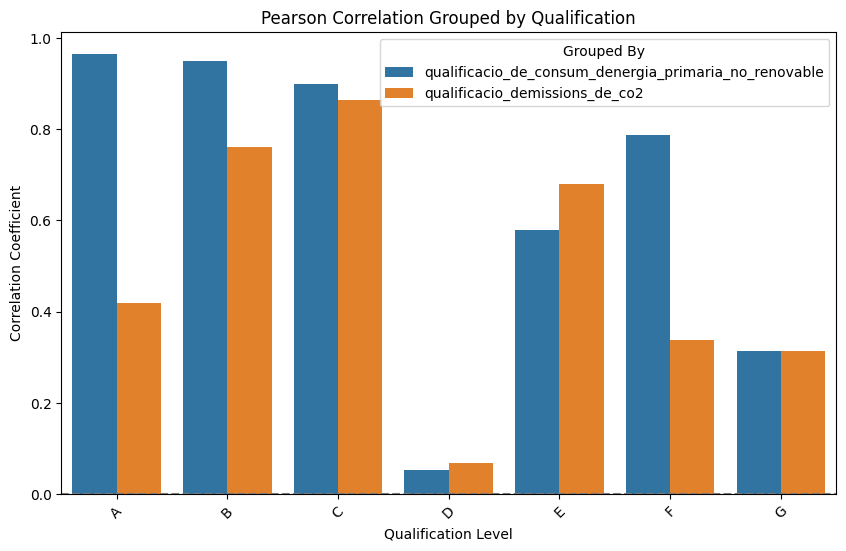

C:\Users\oriol\AppData\Local\Temp\ipykernel_9764\2670671145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Correlation Coefficient"] = results["Correlation Coefficient"].astype(float)


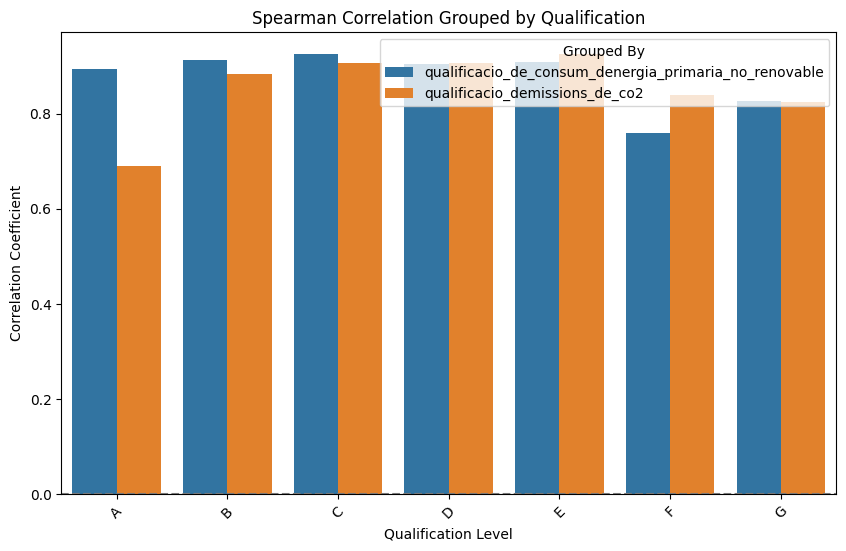

C:\Users\oriol\AppData\Local\Temp\ipykernel_9764\2670671145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Correlation Coefficient"] = results["Correlation Coefficient"].astype(float)


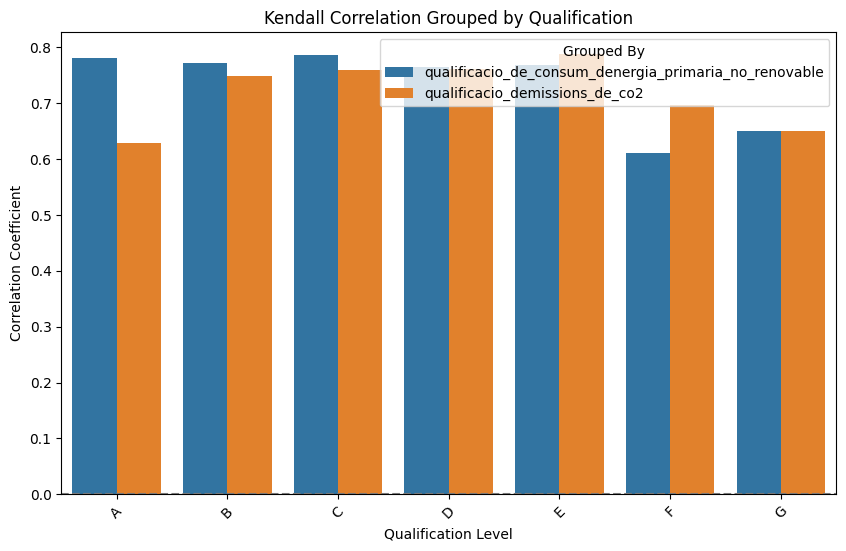

In [43]:
def plot_correlation(correlation_type, title):
    results = correlation_results_grouped[correlation_results_grouped["Correlation Type"] == correlation_type]
    results["Correlation Coefficient"] = results["Correlation Coefficient"].astype(float)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=results, 
        x="Group Name", 
        y="Correlation Coefficient", 
        hue="Group By"
    )
    
    plt.axhline(0, color='gray', linestyle='dashed')  # Add a horizontal line at 0
    plt.xlabel("Qualification Level")
    plt.ylabel("Correlation Coefficient")
    plt.title(title)
    plt.legend(title="Grouped By")
    plt.xticks(rotation=45)
    plt.show()

plot_correlation("Pearson", "Pearson Correlation Grouped by Qualification")
plot_correlation("Spearman", "Spearman Correlation Grouped by Qualification")
plot_correlation("Kendall", "Kendall Correlation Grouped by Qualification")


In [63]:
df_big["qualificacio_demissions_de_co2"].value_counts()/len(df_big)

qualificacio_demissions_de_co2
E    0.559692
D    0.126448
F    0.115922
G    0.102432
C    0.056486
B    0.020438
A    0.018583
Name: count, dtype: float64

In [64]:
df_big["emissions_de_co2"].value_counts()/len(df_big)

emissions_de_co2
37.50      4.948257e-04
36.40      4.835966e-04
35.00      4.798536e-04
34.60      4.791050e-04
34.50      4.708704e-04
               ...     
176.73     7.486016e-07
154.49     7.486016e-07
139.31     7.486016e-07
3525.30    7.486016e-07
152.05     7.486016e-07
Name: count, Length: 17906, dtype: float64

In [65]:
max(df_big["data_entrada"])

'31/12/2024'

## Plots

(0.0, 2000.0)

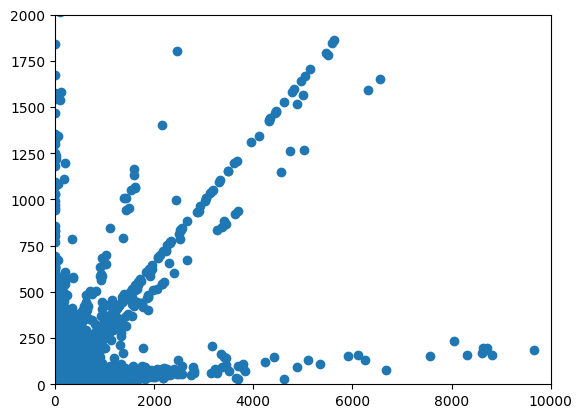

In [67]:
plt.scatter(df["consum_denergia_final"],df["emissions_de_co2"])
plt.xlim(0,10000)
plt.ylim(0,2000)

## Feature engineering

In [51]:
df_big["ratio_eficiencia"] = np.maximum(0,(df_big["consum_denergia_final"]/df_big["emissions_de_co2"]))

In [52]:
df_big["ratio_eficiencia"] = df_big["ratio_eficiencia"].replace([np.inf, -np.inf], np.nan)

In [53]:
quals = np.unique(df_big["qualificacio_demissions_de_co2"])

In [54]:
for q in quals:
    ar = df_big[df_big["qualificacio_demissions_de_co2"]==q]["ratio_eficiencia"].dropna()
    mean_ratio = np.mean(df_big[df_big["qualificacio_demissions_de_co2"]==q]["ratio_eficiencia"].dropna())
    print(f"Qualificacion: {q} - mean: {mean_ratio} - q1: {np.quantile(ar,0.25)} - q2: {np.quantile(ar,0.50)} - q3: {np.quantile(ar,0.75)}")

Qualificacion: A - mean: 8.19449422926375 - q1: 3.0196560196560194 - q2: 3.023890784982935 - q3: 3.936463035845198
Qualificacion: B - mean: 3.9240782672703585 - q1: 3.020606060606061 - q2: 3.072463768115942 - q3: 3.777955271565495
Qualificacion: C - mean: 3.199609111128034 - q1: 3.020769321544634 - q2: 3.1549226614289223 - q3: 3.7753277544055424
Qualificacion: D - mean: 3.141288902928902 - q1: 3.0209569182937863 - q2: 3.494963164150499 - q3: 3.9047412605026044
Qualificacion: E - mean: 3.2483876617888967 - q1: 3.0215503377291735 - q2: 3.771316661645074 - q3: 3.944206806769574
Qualificacion: F - mean: 3.077442287994564 - q1: 3.0211242054049277 - q2: 3.665729543742063 - q3: 3.9449634591780463
Qualificacion: G - mean: 2.68598770814047 - q1: 1.2241113100706302 - q2: 3.215083463432209 - q3: 3.931312314757265


In [55]:
columnas_catastro = ["nom_provincia", "poblacio", "adreca", "comarca"]

In [56]:
df_big[df_big["qualificacio_demissions_de_co2"]=="E"]["ratio_eficiencia"].describe()

count    731437.000000
mean          3.248388
std           2.764869
min           0.000000
25%           3.021550
50%           3.771317
75%           3.944207
max        1275.444444
Name: ratio_eficiencia, dtype: float64

In [57]:
df_big[df_big["qualificacio_demissions_de_co2"]=="E"]["ratio_eficiencia"]

0          2.228908
3          3.210223
11         3.818110
16         3.156027
18         3.199384
             ...   
1335813    3.740849
1335814    3.939731
1335816    3.877419
1335820    0.096618
1335821    3.913559
Name: ratio_eficiencia, Length: 747650, dtype: float64